# Завдання №3

### Змоделювати неперервні випадкові величини, що мають закони розподілу нормальний (гауссовий), Вейбулла, Релея, логнормальний, Коші. Параметри розподілів задати в режимі діалогу. Побудувати графіки отриманих реалізацій.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.stats import cauchy
from scipy.stats import kstest

In [2]:
n = 10000

Запишемо функцію для Гауссового закону розподілу. Використаємо функцію np.random.normal(), щоб згенерувати випадкові числа. 

In [3]:
def Gaussian():
    mu = float(input('Enter mu: '))
    sigma = float(input('Enter sigma: '))
    s_gauss = np.random.normal(mu, sigma, size=n)

    plt.scatter(range(n), s_gauss, color='black', s=0.2)
    plt.show()

    count, bins, ignored = plt.hist(s_gauss, 30, density=True, color='#ffff80')
    plt.plot(bins, 1 / (sigma * np.sqrt(2 * np.pi)) *
             np.exp(- (bins - mu) ** 2 / (2 * sigma ** 2)),
             linewidth=1, color='black')
    plt.title('Gaussian')
    plt.show()
    
    def test(data):
        d, p = kstest(data, 'norm')
        print('p = ', p)
        return p > 0.05

    return f'Mathematical expectation: {np.mean(s_gauss)}\n' \
           f'The variance: {np.var(s_gauss)}\n' \
           f'The distribution is normal: {test(s_gauss)}'

Enter mu: 0
Enter sigma: 1


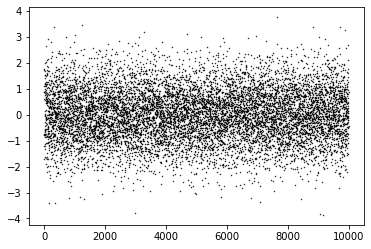

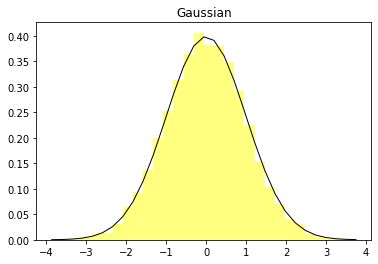

p =  0.591080060467705
Mathematical expectation: -0.000985192480482842
The variance: 0.9776128323887422
The distribution is normal: True


In [4]:
print(Gaussian())

Запишемо функцію для закону розподілу Вейбулла. Використаємо функцію np.random.weibull(), щоб згенерувати випадкові числа. 

In [5]:
def Weibull():
    k = float(input('Enter parameter k: '))
    l = float(input('Enter parameter lambda: '))
    s_weib = np.random.weibull(k, n)

    plt.plot(range(n), s_weib, color='black')
    plt.show()

    count, bins, ignored = plt.hist(s_weib, 30, density=True, color='#ffff80')
    plt.plot(bins, (k / l) * (bins / l) ** (k - 1) * np.exp(-(bins / l) ** k),
             linewidth=1, color='black')
    plt.title('Weibull')
    plt.show()

    return f'Mathematical expectation: {np.mean(s_weib)}\nThe variance: {np.var(s_weib)}\n'

Enter parameter k: 1.5
Enter parameter lambda: 1


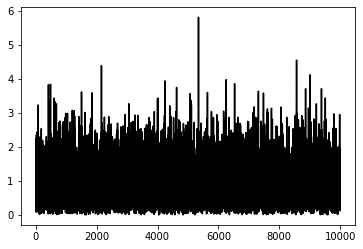

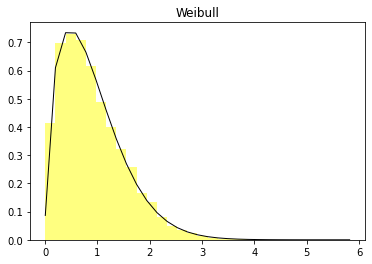

Mathematical expectation: 0.9079301531169316
The variance: 0.37592369226000766



In [6]:
print(Weibull())

Запишемо функцію для закону розподілу Релея. Використаємо функцію np.random.rayleigh(), щоб згенерувати випадкові числа. 

In [7]:
def Rayleigh():
    sigma_r = float(input('Enter sigma: '))

    s_rayl = np.random.rayleigh(sigma_r, size=n)

    plt.plot(range(n), s_rayl, color='black')
    plt.show()

    count, bins, ignored = plt.hist(s_rayl, 30, density=True, color='#ffff80')
    plt.plot(bins, (bins / sigma_r ** 2) * np.exp((- bins ** 2) / (2 * sigma_r ** 2)),
             linewidth=1, color='black')
    plt.title('Rayleigh')
    plt.show()

    def test(data):
        d, p = kstest(data, 'rayleigh')
        print('p = ', p)
        return p > 0.05

    return f'Mathematical expectation: {np.mean(s_rayl)}\n' \
           f'The variance: {np.var(s_rayl)}\n' \
           f'The distribution is Rayleigh: {test(s_rayl)}'

Enter sigma: 1


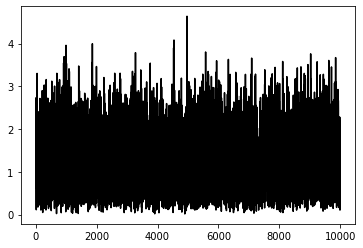

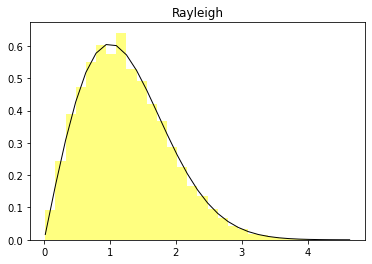

p =  0.30239966603258406
Mathematical expectation: 1.2454007876612747
The variance: 0.4263131980335984
The distribution is Rayleigh: True


In [8]:
print(Rayleigh())

Запишемо функцію для Логнормального закону розподілу. Використаємо функцію np.random.lognormal(), щоб згенерувати випадкові числа. 

In [9]:
def Lognormal():
    mu_l = float(input('Enter mu: '))
    sigma_l = float(input('Enter sigma: '))

    s_logn = np.random.lognormal(mu_l, sigma_l, size=n)

    plt.plot(range(n), s_logn, color='black')
    plt.show()

    count, bins, ignored = plt.hist(s_logn, 50, density=True, align='mid', color='#ffff80')
    pdf = (np.exp(-(np.log(bins) - mu_l) ** 2 / (2 * sigma_l ** 2))
           / (bins * sigma_l * np.sqrt(2 * np.pi)))
    plt.plot(bins, pdf, linewidth=1, color='black')
    plt.axis('tight')
    plt.title('Log-normal')
    plt.show()

    return f'Mathematical expectation: {np.mean(s_logn)}\n' \
           f'The variance: {np.var(s_logn)}\n' 

Enter mu: 0
Enter sigma: 1


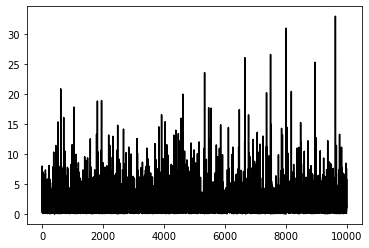

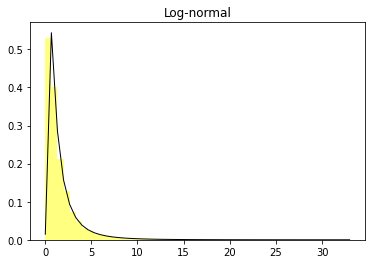

Mathematical expectation: 1.6223886074254814
The variance: 3.899891638561768



In [10]:
print(Lognormal())

Запишемо функцію для закону розподілу Коші. Використаємо функцію scipy.stats.cauchy() , щоб згенерувати випадкові числа. 

In [11]:
def Cauchy():
    gamma = float(input('Enter gamma: '))
    x = float(input('Enter x0: '))

    s_cauchy = cauchy.rvs(loc=x, scale=gamma, size=n)

    plt.plot(range(n), s_cauchy, color='black')
    plt.show()

    plt.hist(s_cauchy[(s_cauchy > -25) & (s_cauchy < 25)], bins=50, color='#ffff80')
    plt.show()

    def test(data):
        d, p = kstest(data, 'cauchy')
        print('p = ', p)
        return p > 0.05

    return f'Mathematical expectation: {np.mean(s_cauchy)}\n' \
           f'The variance: {np.var(s_cauchy)}\n' \
           f'The distribution is Cauchy: {test(s_cauchy)}'

Enter gamma: 1
Enter x0: 0


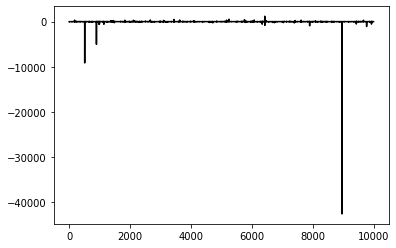

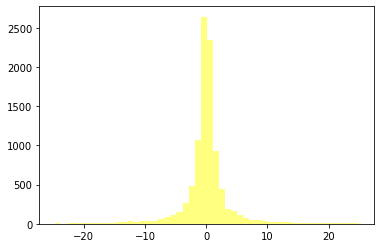

p =  0.8208771691401654
Mathematical expectation: -5.795410148829169
The variance: 193952.84273410615
The distribution is Cauchy: True


In [12]:
print(Cauchy())